# Student ID: 2201195



**Install the required libraries**

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.9 MB/s eta 0:00:00


In [ ]:
!pip install torch
!pip install sklearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import all the required libraries**

In [ ]:
import numpy as np
import os
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler

import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from keras.layers import Bidirectional, BatchNormalization

import pickle 
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Student id to be used for seed**

In [ ]:
student_id = 2201195

Seed libraries with student id

In [ ]:
# set same seeds for all libraries

# numpy seed
np.random.seed(student_id)

# torch seed
torch.manual_seed(student_id)

# Common Codes 

In this section you will write all common codes, for examples


*   Data read
*   Data Splitting
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Allow the GDrive access and set data and model paths**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# initialize GDrive and data and models paths
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id))
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_25.csv', 'train_50.csv', 'train_100.csv', 'train_75.csv', 'code.ipynb']


**Split dataset into 4 sub datasets with different sizes of 25%, 50%, 75% and 100% with seeding the data by student id**

In [ ]:
# Load the train dataset
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') # This is 100% of data
train_data = pd.read_csv(train_file)

# Shuffle the dataset with a fixed seed
# train_data = train_data.sample(frac=1, random_state=student_id).reset_index(drop=True)

# Split the dataset into subsets
train_data_1, remaining_data = train_test_split(train_data, test_size=0.75, stratify=train_data['label'], random_state=student_id)
train_data_2, remaining_data = train_test_split(remaining_data, test_size=0.6667, stratify=remaining_data['label'], random_state=student_id)
train_data_3, train_data_4 = train_test_split(remaining_data, test_size=0.5, stratify=remaining_data['label'], random_state=student_id)

# Combine the subsets to create different data sizes
train_data_25 = train_data_1.copy()
train_data_50 = pd.concat([train_data_1, train_data_2], ignore_index=True)
train_data_75 = pd.concat([train_data_1, train_data_2, train_data_3], ignore_index=True)
train_data_100 = pd.concat([train_data_1, train_data_2, train_data_3, train_data_4], ignore_index=True)

# Save the datasets to Google Drive
train_data_25.to_csv(os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv'), index=False)
train_data_50.to_csv(os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv'), index=False)
train_data_75.to_csv(os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv'), index=False)
train_data_100.to_csv(os.path.join(GOOGLE_DRIVE_PATH, 'train_100.csv'), index=False)

Read the requried files`train` `validation` and `test` files

In [ ]:
train_100_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_100.csv')
train_75_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv')
train_50_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv')
train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv')

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')

print('Train 100% file: ', train_100_file)
print('Train 75% file: ', train_75_file)
print('Train 50% file: ', train_50_file)
print('Train 25% file: ', train_25_file)

print('Validation file: ', val_file)
print('Test file: ', test_file)

Train 100% file:  gdrive/MyDrive/./CE807/Assignment2/2201195/train_100.csv
Train 75% file:  gdrive/MyDrive/./CE807/Assignment2/2201195/train_75.csv
Train 50% file:  gdrive/MyDrive/./CE807/Assignment2/2201195/train_50.csv
Train 25% file:  gdrive/MyDrive/./CE807/Assignment2/2201195/train_25.csv
Validation file:  gdrive/MyDrive/./CE807/Assignment2/2201195/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2201195/test.csv


Dataset info function to explore the dataset and print different statistics about it and it takes the dataset as parameter and its type to print the information of that dataset

In [ ]:
def dataset_info(df, type="Train", label="label"):
    """
      It calculates the number and percentage of samples in 
      the DataFrame that have the label "OFF" and "NOT". 
      It then prints information about the DataFrame such as the number of rows,
      the number of columns, and the column names. 
      Finally, it prints a table summarizing the number 
      and percentage of "OFF" and "NOT" samples in the DataFrame.
      
      Args:
        df
        type
        label

      return None
    """
    
    total = len(df)
    off_count = df[df[label] == 'OFF'].shape[0]
    not_count = df[df[label] == 'NOT'].shape[0]
    off_percentage = (off_count / total) * 100
    not_percentage = (not_count / total) * 100
    
    print("Number of rows:", total)
    print("Number of columns:", len(df.columns))
    print("Columns:", df.columns.tolist())
    # print("Data types:")
    # print(df.dtypes)
    # print("Descriptive statistics:")
    # print(df.describe())
    print("----------------------------------------------")
    print("Dataset | Total |  OFF |  NOT | % OFF | % NOT")
    print(type + "   | {:>5} |{:>5} |{:>5} | {:>5.2f} | {:>5.2f}".format(total, off_count, not_count, off_percentage, not_percentage))
    print("----------------------------------------------")


In [ ]:
def dataset_head_tail(df, count=5):
  """
    It prints the head and the tail of the dataset
    Args:
      df
      count

    return None
  """
    
  print("-------------------------- Head --------------------------")
  print(df.head(count))
  
  print("-------------------------- Tail --------------------------")
  print(df.tail(count))

In [ ]:
def label_ratio_plot(df, label = 'label'):
  """
    plots the ratio between the OFF and NOT label values
    
    Args:
      df
      label

    return None
  """
  
  plt.figure(figsize=(4, 2))
  sns.countplot(x=label, hue=label, data=df, 
              hue_order=['OFF', 'NOT'], 
              palette=['red', 'blue'])
  plt.xlabel('Offensive or Not')
  plt.ylabel('Number of Tweets')
  plt.title('Offensive vs Non-offensive Tweets')
  plt.legend(title=label, loc='upper right')

Dataset labels casting maps (Offensive and Not-offensive) to be used later in models as binary values.

In [ ]:
# converting categorical labels to binary values that can be used in ML models
label_mapping = {'OFF': 1, 'NOT': 0}
inverse_label_mapping = {1: 'OFF', 0: 'NOT'}

### Datasets statisitics and exploration

In [ ]:
print("Validation dataset exploration.")
validation_df = pd.read_csv(val_file)
dataset_info(validation_df, type="valid")
validation_df.head()

Validation dataset exploration.
Number of rows: 927
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
valid   |   927 |  308 |  619 | 33.23 | 66.77
----------------------------------------------


,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT


In [ ]:
print("Test dataset exploration.")
test_df = pd.read_csv(test_file)
dataset_info(test_df, type="test")
test_df.head()

Test dataset exploration.
Number of rows: 860
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
test   |   860 |  240 |  620 | 27.91 | 72.09
----------------------------------------------


,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF


In [ ]:
print("Train full dataset exploration.")
train_df = pd.read_csv(train_file)
dataset_info(train_df, type="Train")
train_df.tail()

Train full dataset exploration.
Number of rows: 12313
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   | 12313 | 4092 | 8221 | 33.23 | 66.77
----------------------------------------------


,id,tweet,label
12308,92805,And Soros money in their pocket. #maga🇺🇸🇺🇸🇺🇸🇺🇸...,NOT
12309,35989,@USER ur a fucking dumbass fr. there’s no way ...,OFF
12310,30188,.@USER They both want you to believe in yourse...,NOT
12311,96815,@USER It's like a reading a leaflet from Antif...,OFF
12312,10460,@USER And they have some of the strictest gun ...,OFF


Train (25%) dataset exploration.
Number of rows: 3078
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |  3078 | 1023 | 2055 | 33.24 | 66.76
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label
0  25978  @USER @USER I will get on my knees and thank G...   NOT
1  80803  @USER @USER @USER Patriachy has harmed black m...   NOT
2  70372  @USER @USER He was a drunk driver that wrecked...   OFF
3  25839  #Tories #Labour #GE2017 #Conservatives Conserv...   NOT
4  99092  @USER @USER He should have started since game ...   NOT
-------------------------- Tail --------------------------
         id                                              tweet label
3073  59158  @USER My pleasure! Thank you for following bac...   NOT
3074  21143                          @USER @USER emba

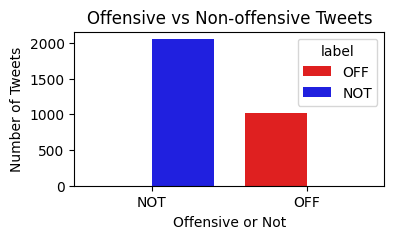

In [ ]:
print("Train (25%) dataset exploration.")
train_25_df = pd.read_csv(train_25_file)
label_ratio_plot(train_25_df)
dataset_info(train_25_df, type="Train")
dataset_head_tail(train_25_df)

Train (50%) dataset exploration.
Number of rows: 6156
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |  6156 | 2046 | 4110 | 33.24 | 66.76
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label
0  25978  @USER @USER I will get on my knees and thank G...   NOT
1  80803  @USER @USER @USER Patriachy has harmed black m...   NOT
2  70372  @USER @USER He was a drunk driver that wrecked...   OFF
3  25839  #Tories #Labour #GE2017 #Conservatives Conserv...   NOT
4  99092  @USER @USER He should have started since game ...   NOT
-------------------------- Tail --------------------------
         id                                              tweet label
6151  31714  @USER @USER How am I villifying him? He litera...   OFF
6152  67281                              @USER So muc

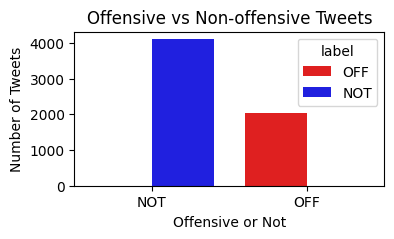

In [ ]:
print("Train (50%) dataset exploration.")
train_50_df = pd.read_csv(train_50_file)
label_ratio_plot(train_50_df)
dataset_info(train_50_df, type="Train")
dataset_head_tail(train_50_df)

Train (75%) dataset exploration.
Number of rows: 9234
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |  9234 | 3069 | 6165 | 33.24 | 66.76
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label
0  25978  @USER @USER I will get on my knees and thank G...   NOT
1  80803  @USER @USER @USER Patriachy has harmed black m...   NOT
2  70372  @USER @USER He was a drunk driver that wrecked...   OFF
3  25839  #Tories #Labour #GE2017 #Conservatives Conserv...   NOT
4  99092  @USER @USER He should have started since game ...   NOT
-------------------------- Tail --------------------------
         id                                              tweet label
9229  57752                          Calif buys more #MAGA URL   NOT
9230  12391  @USER @USER You are just another liberal

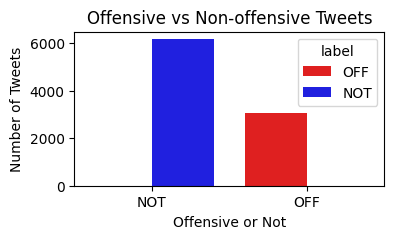

In [ ]:
print("Train (75%) dataset exploration.")
train_75_df = pd.read_csv(train_75_file)
label_ratio_plot(train_75_df)
dataset_info(train_75_df, type="Train")
dataset_head_tail(train_75_df)

Train (100%) dataset exploration.
Number of rows: 12313
Number of columns: 3
Columns: ['id', 'tweet', 'label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   | 12313 | 4092 | 8221 | 33.23 | 66.77
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label
0  25978  @USER @USER I will get on my knees and thank G...   NOT
1  80803  @USER @USER @USER Patriachy has harmed black m...   NOT
2  70372  @USER @USER He was a drunk driver that wrecked...   OFF
3  25839  #Tories #Labour #GE2017 #Conservatives Conserv...   NOT
4  99092  @USER @USER He should have started since game ...   NOT
-------------------------- Tail --------------------------
          id                                              tweet label
12308  99339                       *MAGA sense is tingling* URL   NOT
12309  39166  @USER Dividing us is no longer work

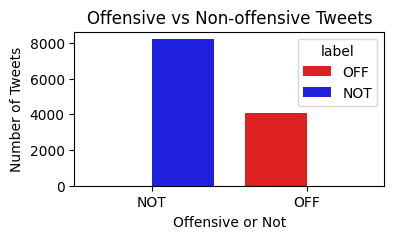

In [ ]:
print("Train (100%) dataset exploration.")
train_100_df = pd.read_csv(train_100_file)
label_ratio_plot(train_100_df)
dataset_info(train_100_df, type="Train")
dataset_head_tail(train_100_df)

Function to calculate different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation based on y_true and y_pred values.

In [ ]:
def compute_performance(y_true, y_pred, split='test'):
    """
    Prints different performance metrics like Accuracy, 
    Recall (macro), Precision (macro), and F1 (macro).
    This also displays a Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score.

    Args:
        y_true: numpy array or list
        y_pred: numpy array or list
        split: str

    Returns:
        float
    """

    print('Computing different performance metrics on', split, 'set of Dataset')
    f1score = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    
    print('F1 Score(macro):', f1score)
    print('Accuracy:', acc)
    print('Recall(macro):', recall)
    print('Precision(macro):', precision)
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=inverse_label_mapping.values(), yticklabels=inverse_label_mapping.values())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for ' + split + ' Set')
    plt.show()

    return f1score

In [ ]:
def plot_history(history):
    """
    Plots the training and validation loss and accuracy.

    Args:
      - history: history object containing the training history.
    """

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

### Data pre preprocessing functions
based on: https://github.com/sondor66/NLP_Offensive_Speech_Exploratory_Analysis/blob/master/OLID_Hate_Speech_Exploratory_Analysis_NLP.ipynb


In [ ]:
# function to remove non-ascii characters from text
def remove_non_ascii_chars(text):
    """
    Removes non-ascii characters from the given text

    Args:
    - text (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    return re.sub(r'[^\x00-\x7F]+', ' ', text)


# function to remove digits from text
def remove_digits(text):
    """
    Removes digits from the given text

    Args:
    - text (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    return re.sub(r'\d+', '', text)


# function to remove HTML tags from text
def remove_html_tags(text):
    """
    Removes HTML tags from the given text

    Args:
    - text (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    return re.sub('(?:<[^>]+>)', '', text)


# function to remove multiple spaces from text
def remove_multiple_spaces(text):
    """
    Removes multiple spaces from the given text

    Args:
    - text (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    return re.sub(r"\s+", " ", text)


# function to remove special characters from text
def remove_special_chars(text):
    """
    Removes special characters from the given text

    Args:
    - text (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    return re.sub(r"[,@\"'?\.$%_]", "", text, flags=re.I)


# function to convert lowercase except for all caps words
def lowercase_except_all_caps(text):
    """
    Converts all words in the given text to lowercase except
    for the words in all caps

    Args:
    - text (str): Text string to be cleaned.]

    Return:
    - str: Cleaned text string.
    """
    return ' '.join([word if word.isupper() else word.lower() for word in text.split()])


# function to remove stopwords from text
def remove_stopwords(text, stopword_list):
    """
    Removes stopwords from the given text

    Args:
    - text (str): Text string to be cleaned
    - stopword_list (list): List of stopwords to be removed

    Return:
    - str: Cleaned text string
    """
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stopword_list])


# function to clean text by applying a series of cleaning steps
def cleaning(intweet):
    """
    Cleans the given text by applying cleaning steps,
    including removing non-ascii characters, digits,
    HTML tags, multiple spaces, special characters, and stopwords

    Args:
    - intweet (str): Text string to be cleaned

    Return:
    - str: Cleaned text string
    """
    clean_tweet = intweet
    clean_tweet = remove_non_ascii_chars(clean_tweet)
    clean_tweet = remove_digits(clean_tweet)
    clean_tweet = remove_html_tags(clean_tweet)
    clean_tweet = remove_multiple_spaces(clean_tweet)
    clean_tweet = remove_special_chars(clean_tweet)
    clean_tweet = lowercase_except_all_caps(clean_tweet)

    stopword_list = set(stopwords.words('english'))
    extra_stopwords = ["\"", "\"", "n't", "'s", "...", "!", "?", "I", "@USER", "USER", "URL", ".", ";", ":", "/", "\\", ",", "#", "@", "$", "&", ")", "(", "\""]
    stopword_list.update(extra_stopwords)

    clean_tweet = remove_stopwords(clean_tweet, stopword_list)
    return clean_tweet

# function to stem words in text
def stem(txt):
    """
    Stems the words in the given text using the Porter stemming algorithm

    Args:
    - txt (str): Text string to be stemmed.

    Return:
    - str: Stemmed text string.
    """
    stemmer = PorterStemmer()
    words = word_tokenize(txt)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Method 1 Start



### Model 1 files

In [ ]:
# Model 1 directory
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1')
print('Model 1 directory: ', MODEL_1_DIRECTORY)

# Model 1 trained using 25% of train data directory
MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25')
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

# Model 1 trained using 50% of train data directory
MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50')
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

# Model 1 trained using 75% of train data directory
MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75')
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

# Model 1 trained using 100% of train data directory
MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100')
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

# Output file using Model 1 trained using 25% of train data
model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') 
print('Output file name using model 1 using 25% of train data: ', model_1_25_output_test_file)

# Output file using Model 1 trained using 50% of train data
model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') 
print('Output file name using model 1 using 50% of train data: ', model_1_50_output_test_file)

# Output file using Model 1 trained using 75% of train data
model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') 
print('Output file name using model 1 using 75% of train data: ', model_1_75_output_test_file)

# Output file using Model 1 trained using 100% of train data
model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') 
print('Output file name using model 1 using 100% of train data: ', model_1_100_output_test_file)

Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25
Model 1 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50
Model 1 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75
Model 1 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/output_test.csv
Output file name using model 1 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/output_test.csv
Output file name using model 1 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/output_test.csv
Output file name using model 1 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/output_test.csv


### Model 1 data preprocessing a preperation

In [ ]:
# function to prepare dataset for training and testing
def prepare_dataset1(data, count_vectorizer=None, split='test'):
  """
  Prepares the dataset for training and testing by 
  applying cleaning and stemming to the text data and converting it 
  into a matrix of token counts using CountVectorizer.

  Args:
  - data : Data Frame object containing the data to be processed.
  - count_vectorizer : An optional pre-fitted CountVectorizer object.
  - split: A string specifying whether to prepare the data for training or testing. 
           Valid values are 'train' and 'test'.

  Return:
    - A tuple containing:
      - X (numpy.ndarray): A matrix of token counts representing the processed text data.
      - count_vectorizer (CountVectorizer): CountVectorizer object that has been fit to the data.
        This object is returned only if split='train'.
  """
  # make a copy of the data
  cleaned_data = data.copy()

  # apply cleaning to the copy
  cleaned_data['tweet'] = cleaned_data['tweet'].apply(cleaning)

  # apply stemming to the copy
  cleaned_data['tweet'] = cleaned_data['tweet'].apply(stem)

  if split == 'train':
      count_vectorizer = CountVectorizer(stop_words='english',max_features=5000) 
      values = count_vectorizer.fit_transform(cleaned_data['tweet'].values) 
  else:
      values = count_vectorizer.transform(cleaned_data['tweet'].values)

  if split == 'train':
      return values, count_vectorizer
  else:
      return values

In [ ]:
print(cleaning("@USER #NoPasaran: Unity demo to oppose the far-right"))
print(stem("@USER #NoPasaran: Unity demo to oppose the far-right"))

nopasaran unity demo oppose far-right
@ user # nopasaran : uniti demo to oppos the far-right


### Model 1 declaration

Create an essemble model that is based on different models like RandomForest, Multinomial Naive Bayes , LogisticsRegression and SVC

In [ ]:
def create_ensemble_model():
    """
      Create the esemble model Create an essemble model that is based on 
      different models like RandomForest, LogisticsRegression , 
      Multinomial Naive Bayes and SVC

      Return:
      - ensemble
    """

    print("Creating the ensemble model...")
    clf1 = RandomForestClassifier(n_estimators=100, random_state=student_id)
    clf2 = LogisticRegression(random_state=student_id, max_iter=1000)
    clf3 = SVC(kernel='linear', probability=True, random_state=student_id)
    clf4 = MultinomialNB()
    ensemble = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2), ('svc', clf3), ('mnb', clf4)], voting='soft')
    
    return ensemble

Train the esemble model based on x and y trains values

In [ ]:
def train_ensemble_model(model, X_train, y_train):
    """
      It trains the the esemble model based on x and y train data

      Args:
      - model: the model the needs to be trained
      - X_train: x train data
      - Y_train: y train data

      Return:
      - model
    """
    
    print("Training the ensemble model...")
    model.fit(X_train, y_train)
    return model

In [ ]:
def evaluate_model_with_kfold(model, X, y, k=5):
    print("Evaluating the ensemble model using k-fold cross-validation...")
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')    
    print("K-fold cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    print("Standard deviation:", scores.std())
    return scores

Function that saved the model to the disk based on the model, vectorizer and scaler data and the model directory path and return the saved files.

In [ ]:
def save_model1(model, vectorizer, scaler, model_dir):
    """
      It saves the model, vectorizer, scaler files

      Args:
      - model: the model the needs to be saved
      - vectorizer: vectorizer data
      - scaler: scaler data
      - model_dir: Model output Directory

      Return:
      - model_file: Model file name
      - vectorizer_file: Vectorizer file name
      - scaler_file: Scaler file name
    """

    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))
    print('Saved model to ', model_file)
    
    # save the vectorizer to disk
    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))
    print('Saved Vectorizer to ', vectorizer_file)

    # save the scaler to disk
    scaler_file = os.path.join(model_dir, 'scaler.sav')
    pickle.dump(scaler, open(scaler_file, 'wb'))
    print('Saved Scaler to ', scaler_file)

    return model_file, vectorizer_file, scaler_file

Function that loads the model from the disk based on the model, vectorizer and scaler files and return the loaded files.

In [ ]:
def load_model1(model_file, vectorizer_file, scaler_file):
    """
      It loads the model, vectorizer, scaler files

      Args:
      - model_file: Model file name
      - vectorizer_file: Vectorizer file name
      - scaler_file: Scaler file name

      Return:
      - model: the model the has been loaded
      - vectorizer: vectorizer data
      - scaler: scaler data
    """

    # load model, vectorizer, and scaler from disk
    model = pickle.load(open(model_file, 'rb'))
    print('Loaded model from ', model_file)

    vectorizer = pickle.load(open(vectorizer_file, 'rb'))
    print('Loaded Vectorizer from ', vectorizer_file)

    scaler = pickle.load(open(scaler_file, 'rb'))
    print('Loaded Scaler from ', scaler_file)

    return model, vectorizer, scaler

## Training Method 1 Code
Train method take `train_file`, `val_file`,  and `model_dir` as input. It trained on the train_file datapoints, and validate on the val_file datapoints.

In [ ]:
def train_method1(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory

    Return:
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        scaler_file: Scaler file name

    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset1(train_df, split='train') 
    val_values = prepare_dataset1(val_df, count_vectorizer)

    # Scale the data
    scaler = MaxAbsScaler()
    train_values = scaler.fit_transform(train_values)
    val_values = scaler.transform(val_values)

    model = create_ensemble_model()
    model = train_ensemble_model(model, train_values, train_label)

    # k_fold_scores = evaluate_model_with_kfold(model, train_values, train_label, k=5)

    model_file, vectorizer_file, scaler_file = save_model1(model, count_vectorizer, scaler, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    print('Train Split')
    train_f1_score = compute_performance(train_label, train_pred_label, split='train')

    print('Validation Split')
    val_f1_score = compute_performance(val_label, val_pred_label, split='valid')

    return model_file, vectorizer_file, scaler_file

### Training model 1 on different datasets

Train model 1 using of 25% of data
Creating the ensemble model...
Training the ensemble model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/vectorizer.sav
Saved Scaler to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/scaler.sav
Train Split
Computing different performance metrics on train set of Dataset
F1 Score(macro): 0.9517492702086917
Accuracy: 0.958414554905783
Recall(macro): 0.9394025015875733
Precision(macro): 0.9679211726440464
              precision    recall  f1-score   support

         NOT       0.94      1.00      0.97      2055
         OFF       0.99      0.88      0.93      1023

    accuracy                           0.96      3078
   macro avg       0.97      0.94      0.95      3078
weighted avg       0.96      0.96      0.96      3078



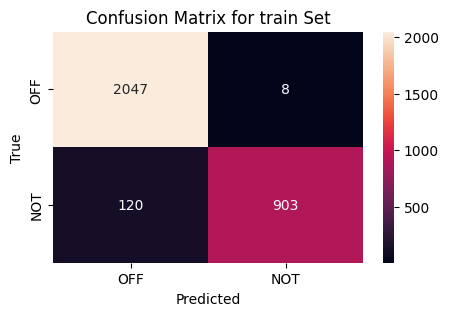

Validation Split
Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6687464507012599
Accuracy: 0.7400215749730313
Recall(macro): 0.6585191867905923
Precision(macro): 0.7166731191121435
              precision    recall  f1-score   support

         NOT       0.76      0.90      0.82       619
         OFF       0.68      0.42      0.52       308

    accuracy                           0.74       927
   macro avg       0.72      0.66      0.67       927
weighted avg       0.73      0.74      0.72       927



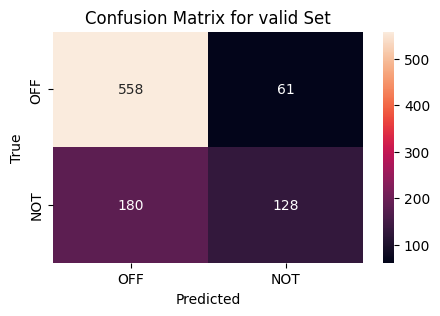

In [ ]:
print('Train model 1 using of 25% of data')
model_25_file, vectorizer_25_file, scaler_25_file = train_method1(train_25_file, val_file, MODEL_1_25_DIRECTORY)

Train model 1 using of 50% of data
Creating the ensemble model...
Training the ensemble model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/vectorizer.sav
Saved Scaler to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/scaler.sav
Train Split
Computing different performance metrics on train set of Dataset
F1 Score(macro): 0.9227671490567798
Accuracy: 0.934535412605588
Recall(macro): 0.905442344328617
Precision(macro): 0.9489320678290692
              precision    recall  f1-score   support

         NOT       0.92      0.99      0.95      4110
         OFF       0.98      0.82      0.89      2046

    accuracy                           0.93      6156
   macro avg       0.95      0.91      0.92      6156
weighted avg       0.94      0.93      0.93      6156



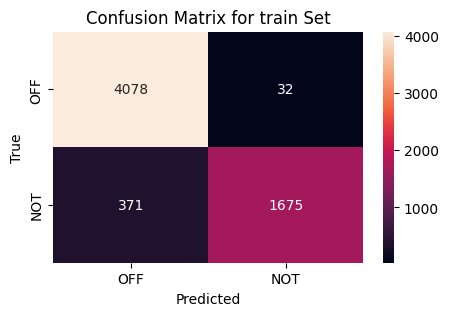

Validation Split
Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6973023550032288
Accuracy: 0.7594390507011867
Recall(macro): 0.6844774772884628
Precision(macro): 0.742772930587001
              precision    recall  f1-score   support

         NOT       0.77      0.91      0.83       619
         OFF       0.71      0.46      0.56       308

    accuracy                           0.76       927
   macro avg       0.74      0.68      0.70       927
weighted avg       0.75      0.76      0.74       927



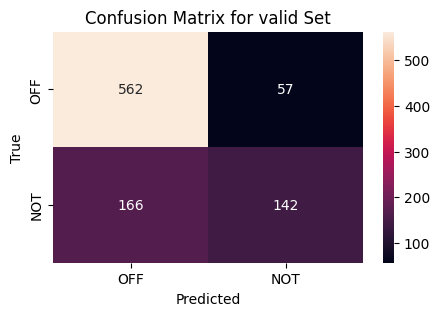

In [ ]:
print('Train model 1 using of 50% of data')
model_50_file, vectorizer_50_file, scaler_50_file = train_method1(train_50_file, val_file, MODEL_1_50_DIRECTORY)

Train model 1 using of 75% of data
Creating the ensemble model...
Training the ensemble model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/vectorizer.sav
Saved Scaler to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/scaler.sav
Train Split
Computing different performance metrics on train set of Dataset
F1 Score(macro): 0.902886812008562
Accuracy: 0.9184535412605588
Recall(macro): 0.8835396584160418
Precision(macro): 0.9345733577794588
              precision    recall  f1-score   support

         NOT       0.90      0.99      0.94      6165
         OFF       0.97      0.78      0.86      3069

    accuracy                           0.92      9234
   macro avg       0.93      0.88      0.90      9234
weighted avg       0.92      0.92      0.92      9234



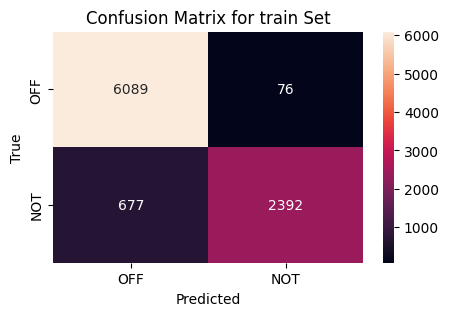

Validation Split
Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6977924739195231
Accuracy: 0.7583603020496225
Recall(macro): 0.6853009672072677
Precision(macro): 0.7395248555853877
              precision    recall  f1-score   support

         NOT       0.77      0.90      0.83       619
         OFF       0.71      0.47      0.56       308

    accuracy                           0.76       927
   macro avg       0.74      0.69      0.70       927
weighted avg       0.75      0.76      0.74       927



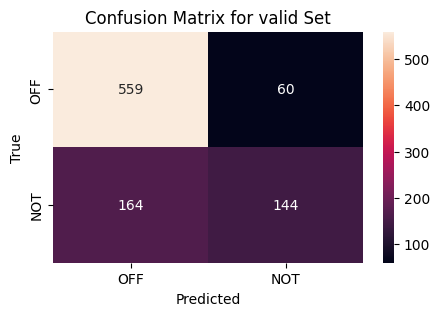

In [ ]:
print('Train model 1 using of 75% of data')
model_75_file, vectorizer_75_file, scaler_75_file = train_method1(train_75_file, val_file, MODEL_1_75_DIRECTORY)

Train model 1 using of 100% of data
Creating the ensemble model...
Training the ensemble model...
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/vectorizer.sav
Saved Scaler to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/scaler.sav
Train Split
Computing different performance metrics on train set of Dataset
F1 Score(macro): 0.8891410684106917
Accuracy: 0.9073337123365549
Recall(macro): 0.8692347626057912
Precision(macro): 0.9231275489139396
              precision    recall  f1-score   support

         NOT       0.89      0.98      0.93      8221
         OFF       0.96      0.76      0.84      4092

    accuracy                           0.91     12313
   macro avg       0.92      0.87      0.89     12313
weighted avg       0.91      0.91      0.90     12313



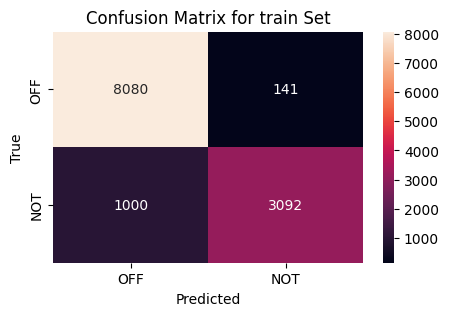

Validation Split
Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.7090341758830154
Accuracy: 0.761596548004315
Recall(macro): 0.6975116967039423
Precision(macro): 0.7384045584045584
              precision    recall  f1-score   support

         NOT       0.78      0.89      0.83       619
         OFF       0.69      0.51      0.59       308

    accuracy                           0.76       927
   macro avg       0.74      0.70      0.71       927
weighted avg       0.75      0.76      0.75       927



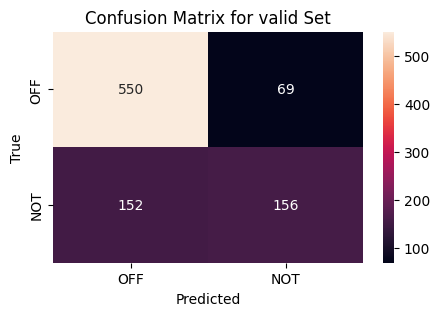

In [ ]:
print('Train model 1 using of 100% of data')
model_100_file, vectorizer_100_file, scaler_100_file = train_method1(train_100_file, val_file, MODEL_1_100_DIRECTORY)

## Testing Method 1 Code
The test method for the first model that takes `test_file`, `model_file`, `vectorizer_file`, `scaler_file` and `output_dir` as input. It print all performance metrics, and save the output file in the `output_dir`  

In [ ]:
def test_method1(test_file, model_file, output_dir, vectorizer_file, scaler_file):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

    Args:
        test_file: Test file name
        model_file: Model file name
        output_dir: Output Directory
        vectorizer_file: Vectorizer file name
        scaler_file: Scaler file name

    Return:
      test_df
    
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']

    model, vectorizer, scaler = load_model1(model_file, vectorizer_file, scaler_file) 

    test_values = prepare_dataset1(test_df, vectorizer)

    # Scale the test data using the scaler
    test_values = scaler.transform(test_values)

    test_pred_label = model.predict(test_values)

    test_df['out_label'] = test_pred_label

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    return test_df

### Testing Model 1 on different datasets

Testing model 1 using ensemble model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/vectorizer.sav
Loaded Scaler from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/scaler.sav
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.7204420915761123
Accuracy: 0.8046511627906977
Recall(macro): 0.698521505376344
Precision(macro): 0.7803294867901609
              precision    recall  f1-score   support

         NOT       0.82      0.94      0.87       620
         OFF       0.74      0.46      0.57       240

    accuracy                           0.80       860
   macro avg       0.78      0.70      0.72       860
weighted avg       0.80      0.80      0.79       860



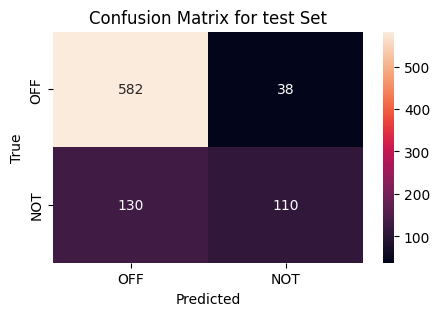

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/25/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  148 |  712 | 17.21 | 82.79
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing model 1 using ensemble model trained on 25% data')
test_25_df = test_method1(test_file, model_25_file, MODEL_1_25_DIRECTORY, vectorizer_25_file, scaler_25_file)
dataset_info(test_25_df, label = "out_label")
dataset_head_tail(test_25_df, 10)

Testing model 1 using ensemble model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/vectorizer.sav
Loaded Scaler from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/scaler.sav
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.7164395356768051
Accuracy: 0.7965116279069767
Recall(macro): 0.697983870967742
Precision(macro): 0.7593058770717624
              precision    recall  f1-score   support

         NOT       0.82      0.92      0.87       620
         OFF       0.70      0.47      0.57       240

    accuracy                           0.80       860
   macro avg       0.76      0.70      0.72       860
weighted avg       0.79      0.80      0.78       860



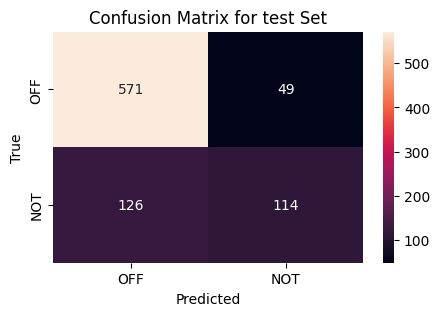

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/50/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  163 |  697 | 18.95 | 81.05
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       OFF
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing model 1 using ensemble model trained on 50% data')
test_50_df = test_method1(test_file, model_50_file, MODEL_1_50_DIRECTORY, vectorizer_50_file, scaler_50_file)
dataset_info(test_50_df, label = "out_label")
dataset_head_tail(test_50_df, 10)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/vectorizer.sav
Loaded Scaler from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/scaler.sav
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.7354478146644375
Accuracy: 0.8127906976744186
Recall(macro): 0.7131048387096774
Precision(macro): 0.7901853122855182
              precision    recall  f1-score   support

         NOT       0.83      0.94      0.88       620
         OFF       0.75      0.49      0.59       240

    accuracy                           0.81       860
   macro avg       0.79      0.71      0.74       860
weighted avg       0.81      0.81      0.80       860



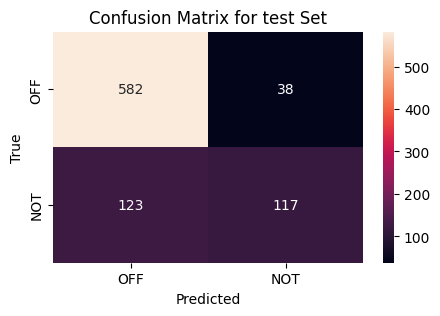

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/75/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  155 |  705 | 18.02 | 81.98
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing using model trained on 75% data')
test_75_df = test_method1(test_file, model_75_file, MODEL_1_75_DIRECTORY, vectorizer_75_file, scaler_75_file)
dataset_info(test_75_df, label = "out_label")
dataset_head_tail(test_75_df, 10)

Testing model 1 using ensemble model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/vectorizer.sav
Loaded Scaler from  gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/scaler.sav
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.7510465841275498
Accuracy: 0.8186046511627907
Recall(macro): 0.7311827956989247
Precision(macro): 0.7906976744186047
              precision    recall  f1-score   support

         NOT       0.84      0.93      0.88       620
         OFF       0.74      0.53      0.62       240

    accuracy                           0.82       860
   macro avg       0.79      0.73      0.75       860
weighted avg       0.81      0.82      0.81       860



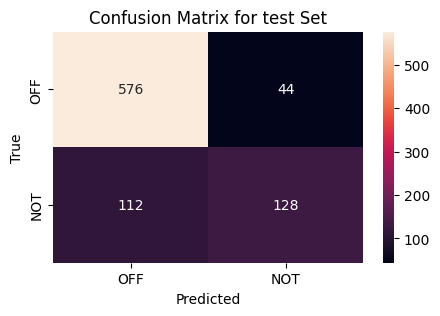

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/1/100/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  172 |  688 | 20.00 | 80.00
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to

In [ ]:
print('Testing model 1 using ensemble model trained on 100% data')
test_100_df = test_method1(test_file, model_100_file, MODEL_1_100_DIRECTORY, vectorizer_100_file, scaler_100_file)
dataset_info(test_100_df, label = "out_label")
dataset_head_tail(test_100_df, 10)

## Method 1 End


# Method 2 Start
 

### Model 2 files

In [ ]:
# Model 2 directory
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2')
print('Model 2 directory: ', MODEL_2_DIRECTORY)

# Model 2 trained using 25% of train data directory
MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25')
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

# Model 2 trained using 50% of train data directory
MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50')
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

# Model 2 trained using 75% of train data directory
MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75')
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

# Model 2 trained using 100% of train data directory
MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100')
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

# Output file using Model 2 trained using 25% of train data
model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') 
print('Output file name using model 2 using 25% of train data: ', model_2_25_output_test_file)

# Output file using Model 2 trained using 50% of train data
model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') 
print('Output file name using model 2 using 50% of train data: ', model_2_50_output_test_file)

# Output file using Model 2 trained using 75% of train data
model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') 
print('Output file name using model 2 using 75% of train data: ', model_2_75_output_test_file)

# Output file using Model 2 trained using 100% of train data
model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') 
print('Output file name using model 2 using 100% of train data: ', model_2_100_output_test_file)


Model 2 directory:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2
Model 2 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/25
Model 2 directory with 50% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/50
Model 2 directory with 75% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75
Model 2 directory with 100% data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/100
Output file name using model 2 using 25% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/25/output_test.csv
Output file name using model 2 using 50% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/50/output_test.csv
Output file name using model 2 using 75% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75/output_test.csv
Output file name using model 2 using 100% of train data:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/100/output_test.csv


### Model 2 data preprocessing a preperation

Prepares the dataset for training and testing by applying cleaning to the text data, tokenizing the text data, and padding the sequences to a fixed length.

In [ ]:
# function to prepare dataset for training and testing
def prepare_dataset2(data, tokenizer=None, max_length=50, split='test'):
    """
    Prepares the dataset for training and testing by applying 
    cleaning to the text data, tokenizing the text data, and 
    padding the sequences to a fixed length.

    Args:
    - data: Data Frame object containing the data to be processed.
    - tokenizer: An optional pre-fitted Tokenizer object.
    - max_length: specify the maximum length of the padded sequences
    - split: specify whether to prepare the data for training or testing. 
             Valid values are 'train' and 'test'.

    Return:
    - A tuple containing:
        - X: matrix of padded sequences representing the processed text data.
        - tokenizer: Tokenizer object that has been fit to the data.
                     It is returned only if split='train'.
    """

    # copy the data
    cleaned_data = data.copy()

    # apply cleaning to the copy
    cleaned_data['tweet'] = cleaned_data['tweet'].apply(cleaning)

    # apply stemming to the copy
    # cleaned_data['tweet'] = cleaned_data['tweet'].apply(stem)
    
    if split == 'train':
        tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
        tokenizer.fit_on_texts(cleaned_data['tweet'].values)
        sequences = tokenizer.texts_to_sequences(cleaned_data['tweet'].values)
    else:
        sequences = tokenizer.texts_to_sequences(cleaned_data['tweet'].values)

    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

    if split == 'train':
        return padded_sequences, tokenizer
    else:
        return padded_sequences

In [ ]:
# def create_lstm_model(vocab_size, embedding_dim):
#   """
#   This function creates a deep learning model architecture for sentiment analysis using LSTM units. 
#   The model consists of an embedding layer, an LSTM layer, and two dense layers, with a dropout layer in between.

#   Args:
#   - vocab_size: the size of the vocabulary.
#   - embedding_dim: the dimension of the embedding vectors.

#   Returns:
#   - model: a deep learning model.

#   """
#   model = Sequential()
#   model.add(Embedding(vocab_size, embedding_dim))
#   model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) 
#   model.add(Dense(64, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(1, activation='sigmoid'))
#   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#   return model

function to create LSTM model

In [ ]:
def create_lstm_model(vocab_size, embedding_dim):
    """
    Creates a bidirectional LSTM model for text classification.

    Args:
    - vocab_size: specify the size of the vocabulary.
    - embedding_dim: specify the dimensionality of the embedding.

    Return:
    - model: Keras model object.
    """
    model = Sequential()
    
    # trainable embeddings
    model.add(Embedding(vocab_size, embedding_dim))
    
    model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# function to train LSTM model
def train_lstm_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    """
    Trains the LSTM model on the training data and evaluates it on the validation data.

    Args:
      - model: model object to be trained.
      - X_train: An array of training input data.
      - y_train: An array of training target data.
      - X_val: An array of validation input data.
      - y_val: An array of validation target data.
      - epochs: specifiy the number of training epochs.
      - batch_size: specifiy the batch size for training.

    Return:
      - model: trained Keras model object.
      - history: history object containing the training history.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])
    return model, history

Function that saves an LSTM model and tokenizer to files based on the model directory and the model data and tokenizer data.

In [ ]:
# function to save the LSTM model and tokenizer
def save_model2(model, tokenizer, model_dir):
    """
    Saves an LSTM model and tokenizer to files.

    Args:
      - model: Keras model object to be saved.
      - tokenizer: Tokenizer object to be saved.
      - model_dir: string path to the model directory.

    Return:
      - model_file: string path to the saved model file.
      - tokenizer_file : string path to the saved tokenizer file.
    """
    # Save the model to disk
    model_file = os.path.join(model_dir, 'model.h5')
    model.save(model_file)

    print('Saved model 2 to ', model_file)

    # Save the tokenizer to disk using pickle
    tokenizer_file = os.path.join(model_dir, 'tokenizer.sav') 
    pickle.dump(tokenizer, open(tokenizer_file, 'wb'))

    print('Saved tokenizer to ', tokenizer_file)

    # Return the paths to the saved model and tokenizer files
    return model_file, tokenizer_file

In [ ]:
# function to load the LSTM model and tokenizer
def load_model2(model_file, tokenizer_file):
    """
    Loads an LSTM model and tokenizer from files.

    Args:
      - model_file: string path to the saved model file.
      - tokenizer_file: string path to the saved tokenizer file.

    Return:
      - model: Keras model object loaded from file.
      - tokenizer: Tokenizer object loaded from file.
    """
    # Load the model from disk
    model = load_model(model_file)

    print('Loaded model 2:', model_file)

    # Load the tokenizer from disk using pickle
    tokenizer = pickle.load(open(tokenizer_file, 'rb'))

    # Return the loaded model and tokenizer as a tuple
    return model, tokenizer

## Training Method 2 Code


In [ ]:
def train_method2(train_file, val_file, model_dir, epochs=10, embedding_dim=300):
  """
    Takes train_file, val_file and model_dir as input.
    It trained on the train_file datapoints, and validate on the val_file datapoints.
    While training and validating, it print different evaluataion metrics
    and losses, wheverever necessary.
    After finishing the training, it saved the best model in the model_dir.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
        epochs: specifiy the number of training epochs.
        batch_size: specifiy the batch size for training.
    Return:
        model_file: specify the path to the saved model file.
        tokenizer_file: specify the path to the saved tokenizer file.
  """

  train_df = pd.read_csv(train_file)
  val_df = pd.read_csv(val_file)

  train_df['label'] = train_df['label'].replace(label_mapping)
  val_df['label'] = val_df['label'].replace(label_mapping)

  train_label = train_df['label']
  val_label = val_df['label']

  train_values, tokenizer = prepare_dataset2(train_df, split='train') 
  val_values = prepare_dataset2(val_df, tokenizer)

  vocab_size = len(tokenizer.word_index) + 1

  model = create_lstm_model(vocab_size, embedding_dim)
  model, history = train_lstm_model(model, train_values, train_label, val_values, val_label, epochs)

  model_file, tokenizer_file = save_model2(model, tokenizer, model_dir)

  threshold = 0.5
  train_pred_label = (model.predict(train_values) > threshold)
  val_pred_label = (model.predict(val_values) > threshold)

  train_f1_score = compute_performance(train_label, train_pred_label, split='train')
  val_f1_score = compute_performance(val_label, val_pred_label, split='valid')
  plot_history(history)

  return model_file, tokenizer_file

### Training Model 2 on different datasets

Train model 2 using of 25% of data
Epoch 1/10
97/97 [==============================] - 68s 565ms/step - loss: 1.6570 - accuracy: 0.5530 - val_loss: 1.2711 - val_accuracy: 0.6677
Epoch 2/10
97/97 [==============================] - 54s 555ms/step - loss: 1.0838 - accuracy: 0.7411 - val_loss: 1.0489 - val_accuracy: 0.6677
Epoch 3/10
97/97 [==============================] - 53s 547ms/step - loss: 0.6710 - accuracy: 0.8756 - val_loss: 0.8949 - val_accuracy: 0.7184
Epoch 4/10
97/97 [==============================] - 54s 553ms/step - loss: 0.4684 - accuracy: 0.9146 - val_loss: 0.7982 - val_accuracy: 0.7012
Epoch 5/10
97/97 [==============================] - 54s 554ms/step - loss: 0.3296 - accuracy: 0.9506 - val_loss: 0.7861 - val_accuracy: 0.7174
Epoch 6/10
97/97 [==============================] - 52s 542ms/step - loss: 0.2387 - accuracy: 0.9626 - val_loss: 0.8936 - val_accuracy: 0.7206
Epoch 7/10
97/97 [==============================] - 54s 559ms/step - loss: 0.1996 - accuracy: 0.9646 - val_

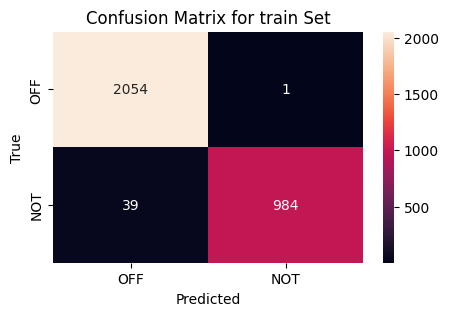

Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6449090062042905
Accuracy: 0.7206040992448759
Recall(macro): 0.637454629377085
Precision(macro): 0.6864187343501025
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       619
           1       0.63      0.39      0.48       308

    accuracy                           0.72       927
   macro avg       0.69      0.64      0.64       927
weighted avg       0.71      0.72      0.70       927



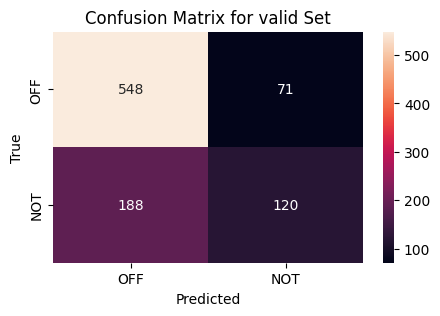

In [ ]:
print('Train model 2 using of 25% of data')
model2_25_file, tokenizer2_25_file = train_method2(train_25_file, val_file, MODEL_2_25_DIRECTORY)

Train model 2 using of 50% of data
Epoch 1/10
193/193 [==============================] - 148s 727ms/step - loss: 1.4742 - accuracy: 0.5879 - val_loss: 1.1005 - val_accuracy: 0.6688
Epoch 2/10
193/193 [==============================] - 120s 620ms/step - loss: 0.8512 - accuracy: 0.7575 - val_loss: 0.8024 - val_accuracy: 0.7206
Epoch 3/10
193/193 [==============================] - 118s 613ms/step - loss: 0.4901 - accuracy: 0.8653 - val_loss: 0.6740 - val_accuracy: 0.7487
Epoch 4/10
193/193 [==============================] - 119s 615ms/step - loss: 0.3238 - accuracy: 0.9089 - val_loss: 0.8220 - val_accuracy: 0.7325
Epoch 5/10
193/193 [==============================] - 119s 617ms/step - loss: 0.2319 - accuracy: 0.9365 - val_loss: 0.8777 - val_accuracy: 0.7228
Epoch 6/10
193/193 [==============================] - 118s 611ms/step - loss: 0.1857 - accuracy: 0.9469 - val_loss: 0.8717 - val_accuracy: 0.7325
Saved model 2 to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/50/model.h5
Saved t

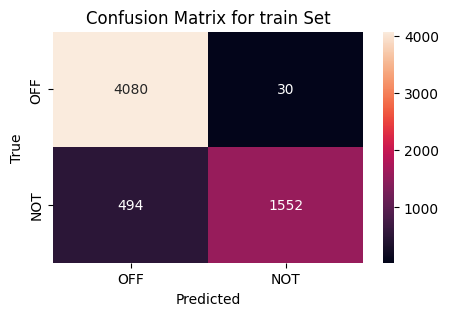

Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6764107058585586
Accuracy: 0.7486515641855448
Recall(macro): 0.6649812223317877
Precision(macro): 0.7329477285856056
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       619
           1       0.71      0.42      0.52       308

    accuracy                           0.75       927
   macro avg       0.73      0.66      0.68       927
weighted avg       0.74      0.75      0.73       927



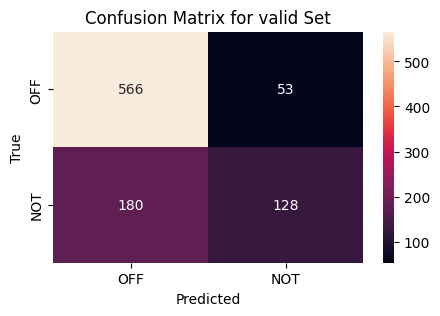

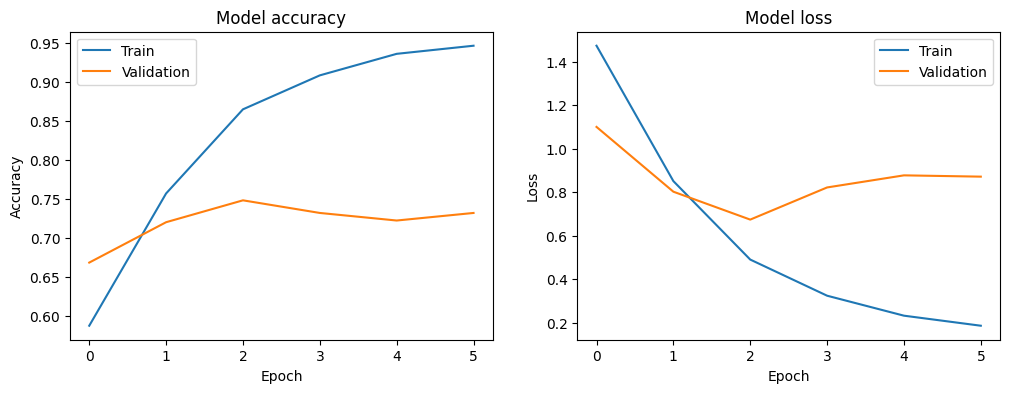

In [ ]:
print('Train model 2 using of 50% of data')
model2_50_file, tokenizer2_50_file = train_method2(train_50_file, val_file, MODEL_2_50_DIRECTORY, epochs=10)

Train model 2 using of 75% of data
Epoch 1/10
289/289 [==============================] - 195s 647ms/step - loss: 1.3347 - accuracy: 0.6107 - val_loss: 0.9187 - val_accuracy: 0.6677
Epoch 2/10
289/289 [==============================] - 182s 631ms/step - loss: 0.6849 - accuracy: 0.7759 - val_loss: 0.6776 - val_accuracy: 0.7184
Epoch 3/10
289/289 [==============================] - 182s 629ms/step - loss: 0.4421 - accuracy: 0.8444 - val_loss: 0.7309 - val_accuracy: 0.6516
Epoch 4/10
289/289 [==============================] - 218s 755ms/step - loss: 0.3230 - accuracy: 0.8831 - val_loss: 0.7290 - val_accuracy: 0.7120
Epoch 5/10
289/289 [==============================] - 182s 629ms/step - loss: 0.2435 - accuracy: 0.9190 - val_loss: 0.8490 - val_accuracy: 0.6990
Saved model 2 to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75/model.h5
Saved tokenizer to  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75/tokenizer.sav
29/29 [==============================] - 3s 94ms/step
Computing 

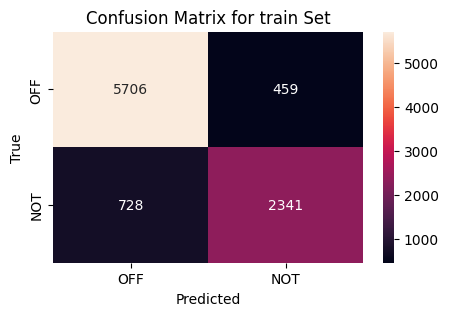

Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6697388590936577
Accuracy: 0.7184466019417476
Recall(macro): 0.6643858968172377
Precision(macro): 0.6794659627101562
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       619
           1       0.59      0.50      0.54       308

    accuracy                           0.72       927
   macro avg       0.68      0.66      0.67       927
weighted avg       0.71      0.72      0.71       927



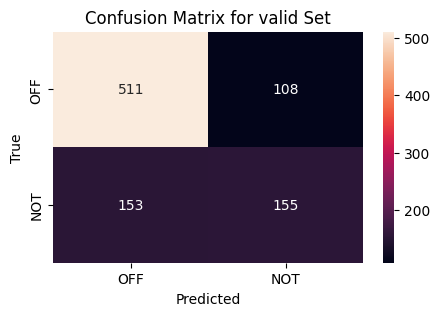

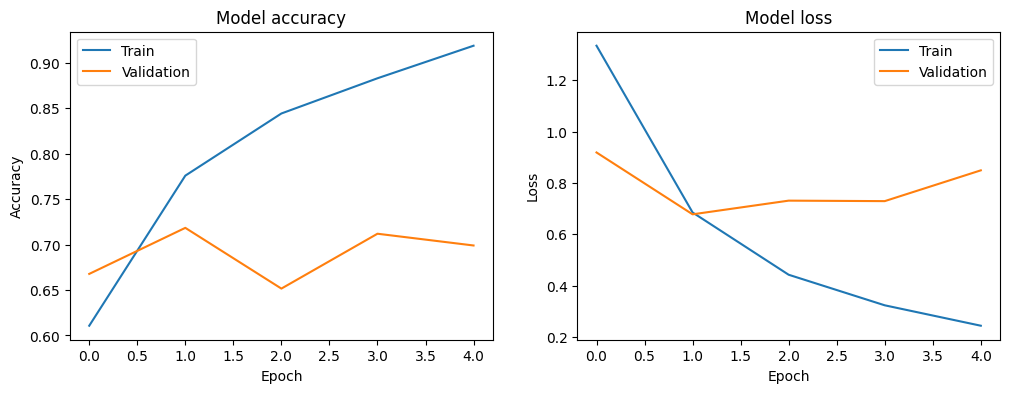

In [ ]:
print('Train model 2 using of 75% of data')
model2_75_file, tokenizer2_75_file = train_method2(train_75_file, val_file, MODEL_2_75_DIRECTORY, epochs=10)

Train model 2 using of 100% of data
Epoch 1/10
385/385 [==============================] - 247s 614ms/step - loss: 1.3121 - accuracy: 0.6311 - val_loss: 0.8903 - val_accuracy: 0.6699
Epoch 2/10
385/385 [==============================] - 230s 597ms/step - loss: 0.6555 - accuracy: 0.7814 - val_loss: 0.6413 - val_accuracy: 0.7422
Epoch 3/10
385/385 [==============================] - 226s 589ms/step - loss: 0.4440 - accuracy: 0.8354 - val_loss: 0.6579 - val_accuracy: 0.7443
Epoch 4/10
385/385 [==============================] - 229s 595ms/step - loss: 0.3454 - accuracy: 0.8723 - val_loss: 0.7397 - val_accuracy: 0.6969
Epoch 5/10
385/385 [==============================] - 228s 593ms/step - loss: 0.2862 - accuracy: 0.8930 - val_loss: 0.8115 - val_accuracy: 0.7174
Epoch 6/10
385/385 [==============================] - 227s 590ms/step - loss: 0.2392 - accuracy: 0.9133 - val_loss: 0.8575 - val_accuracy: 0.7228
Epoch 7/10
385/385 [==============================] - 230s 597ms/step - loss: 0.2124 - a

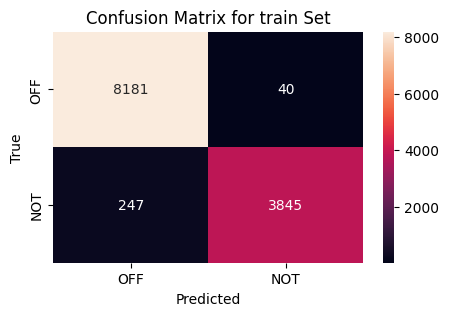

Computing different performance metrics on valid set of Dataset
F1 Score(macro): 0.6759847933786148
Accuracy: 0.7206040992448759
Recall(macro): 0.6717107609676269
Precision(macro): 0.6825822643614055
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       619
           1       0.59      0.53      0.56       308

    accuracy                           0.72       927
   macro avg       0.68      0.67      0.68       927
weighted avg       0.71      0.72      0.72       927



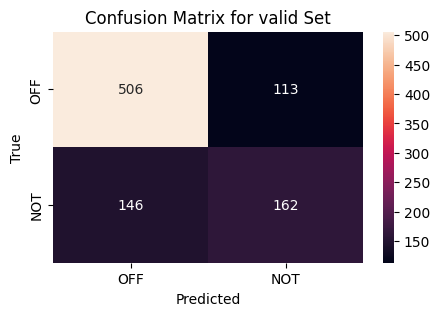

In [ ]:
print('Train model 2 using of 100% of data')
model2_100_file, tokenizer2_100_file = train_method2(train_100_file, val_file, MODEL_2_100_DIRECTORY, epochs=10)

## Testing Method 2 Code

In [ ]:
def test_method2(test_file, model_file, tokenizer_file, output_dir): 
    """
    Takes test_file, model_file, and output_dir as input.
    It loads the model and tests the examples in the test_file.
    It prints different evaluation metrics and saves the output in the output directory.

    Args:
        test_file: Test file name
        model_file: Model file name
        tokenizer_file: Tokenizer file name
        output_dir: Output Directory
    """

    test_df = pd.read_csv(test_file)
    
    test_label = test_df['label']
    test_label = test_label.map(label_mapping)  # Convert labels to integers

    model, tokenizer = load_model2(model_file, tokenizer_file)

    test_values = prepare_dataset2(test_df, tokenizer)

    threshold = 0.5
    test_pred_label = (model.predict(test_values) > threshold)  # Convert predictions to integers

    # Use numpy.vectorize to apply the mapping function to the predicted labels
    map_labels = np.vectorize(inverse_label_mapping.get)
    test_df['out_label'] = map_labels(test_pred_label[:, 0])  # Convert integers back to labels

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    return test_df

### Testing Model 2 on different datasets

Testing using model 2 trained on 25% data
Loaded model 2:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/25/model.h5
27/27 [==============================] - 2s 60ms/step
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.6465506934481109
Accuracy: 0.7441860465116279
Recall(macro): 0.6361559139784946
Precision(macro): 0.674270575282136
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       620
           1       0.56      0.39      0.46       240

    accuracy                           0.74       860
   macro avg       0.67      0.64      0.65       860
weighted avg       0.72      0.74      0.73       860



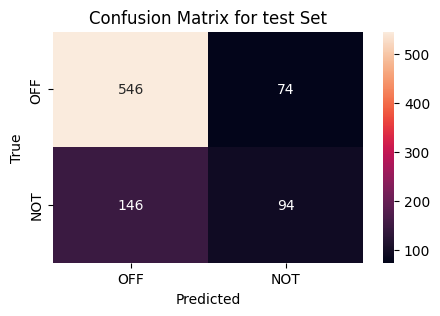

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/25/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  168 |  692 | 19.53 | 80.47
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing using model 2 trained on 25% data')
test2_25_df = test_method2(test_file, model2_25_file, tokenizer2_25_file, MODEL_2_25_DIRECTORY)
dataset_info(test2_25_df, label = "out_label")
dataset_head_tail(test2_25_df, 10)

Testing using model 2 trained on 50% data
Loaded model 2: gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/50/model.h5
27/27 [==============================] - 3s 77ms/step
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.6604358980596604
Accuracy: 0.7546511627906977
Recall(macro): 0.648521505376344
Precision(macro): 0.6909600711995921
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       620
           1       0.59      0.41      0.48       240

    accuracy                           0.75       860
   macro avg       0.69      0.65      0.66       860
weighted avg       0.74      0.75      0.74       860



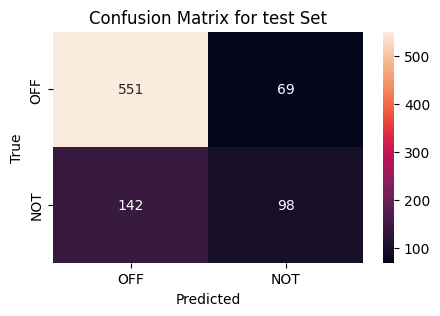

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/50/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  167 |  693 | 19.42 | 80.58
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       OFF
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing using model 2 trained on 50% data')
test2_50_df = test_method2(test_file, model2_50_file, tokenizer2_50_file, MODEL_2_50_DIRECTORY)
dataset_info(test2_50_df, label = "out_label")
dataset_head_tail(test2_50_df, 10)

Testing using model 2 trained on 75% data
Loaded model 2: gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75/model.h5
27/27 [==============================] - 5s 124ms/step
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.6910986786250735
Accuracy: 0.7697674418604651
Recall(macro): 0.6794354838709677
Precision(macro): 0.712979802814205
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       620
           1       0.61      0.47      0.54       240

    accuracy                           0.77       860
   macro avg       0.71      0.68      0.69       860
weighted avg       0.76      0.77      0.76       860



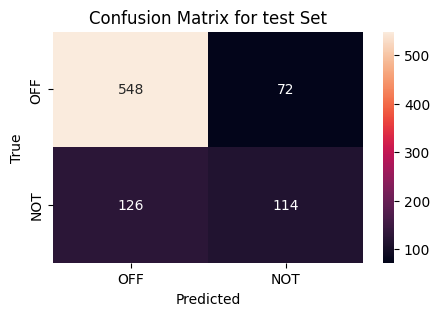

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/75/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
Train   |   860 |  186 |  674 | 21.63 | 78.37
----------------------------------------------
-------------------------- Head --------------------------
      id                                              tweet label out_label
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1  27014  #ConstitutionDay is revered by Conservatives, ...   NOT       OFF
2  30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3  13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4  60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5  83681           . . . What the fuck did he do this time?   OFF       OFF
6  96874  #RAP is a form of ART! Used to 

In [ ]:
print('Testing using model 2 trained on 75% data')
test2_75_df = test_method2(test_file, model2_75_file, tokenizer2_75_file, MODEL_2_75_DIRECTORY)
dataset_info(test2_75_df, label = "out_label")
dataset_head_tail(test2_75_df, 10)

Testing using model 2 trained on 100% data
Loaded model 2:  gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/100/model.h5
27/27 [==============================] - 3s 92ms/step
Computing different performance metrics on test set of Dataset
F1 Score(macro): 0.6822974925729092
Accuracy: 0.75
Recall(macro): 0.678494623655914
Precision(macro): 0.6869751004920768
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       620
           1       0.56      0.52      0.54       240

    accuracy                           0.75       860
   macro avg       0.69      0.68      0.68       860
weighted avg       0.74      0.75      0.75       860



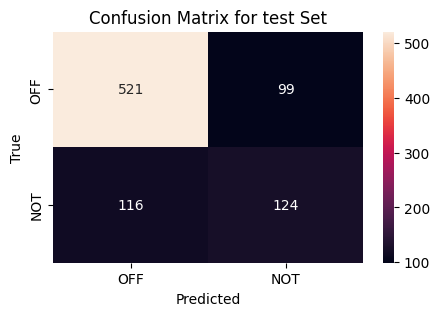

Saving model output to gdrive/MyDrive/./CE807/Assignment2/2201195/models/2/100/output_test.csv
Number of rows: 860
Number of columns: 4
Columns: ['id', 'tweet', 'label', 'out_label']
----------------------------------------------
Dataset | Total |  OFF |  NOT | % OFF | % NOT
test   |   860 |  223 |  637 | 25.93 | 74.07
----------------------------------------------
-------------------------- Head --------------------------
       id                                              tweet label out_label
0   15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...   OFF       OFF
1   27014  #ConstitutionDay is revered by Conservatives, ...   NOT       NOT
2   30530  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...   NOT       NOT
3   13876  #Watching #Boomer getting the news that she is...   NOT       NOT
4   60133  #NoPasaran: Unity demo to oppose the far-right...   OFF       NOT
5   83681           . . . What the fuck did he do this time?   OFF       OFF
6   96874  #RAP is a form of ART! 

In [ ]:
print('Testing using model 2 trained on 100% data')
test2_100_df = test_method2(test_file, model2_100_file, tokenizer2_100_file, MODEL_2_100_DIRECTORY)
dataset_info(test2_100_df, type = "test", label = "out_label")
dataset_head_tail(test2_100_df, 25)

## Method 2 End


Models comparison

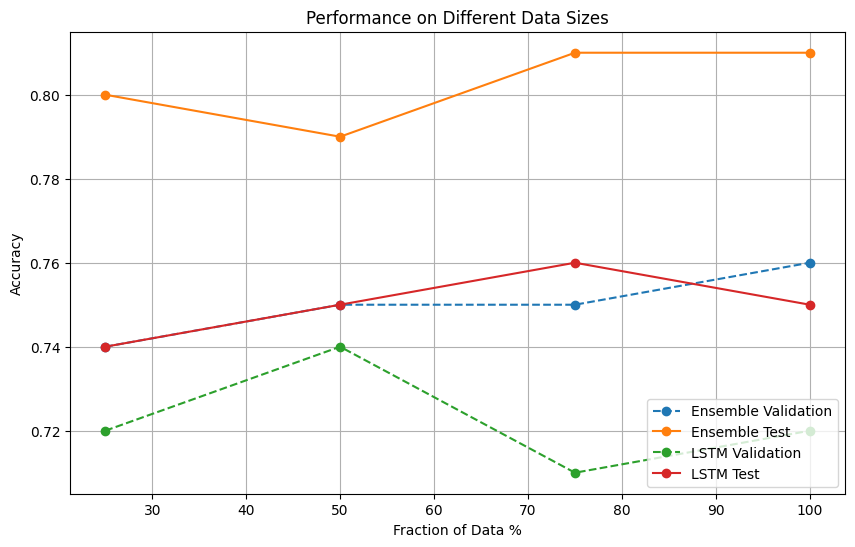

In [ ]:
data_sizes = [25, 50, 75, 100]
ensemble_val_accuracies = [0.74, 0.75, 0.75, 0.76]
ensemble_test_accuracies = [0.8, 0.79, 0.81, 0.81]
lstm_val_accuracies = [0.72, 0.74, 0.71, 0.72]
lstm_test_accuracies = [0.74, 0.75, 0.76, 0.75]

plt.figure(figsize=(10, 6))

plt.plot(data_sizes, ensemble_val_accuracies, label='Ensemble Validation', linestyle='--', marker='o')
plt.plot(data_sizes, ensemble_test_accuracies, label='Ensemble Test', marker='o')
plt.plot(data_sizes, lstm_val_accuracies, label='LSTM Validation', linestyle='--', marker='o')
plt.plot(data_sizes, lstm_test_accuracies, label='LSTM Test', marker='o')

plt.xlabel('Fraction of Data %')
plt.ylabel('Accuracy')
plt.title('Performance on Different Data Sizes')
plt.legend(loc='lower right')
plt.grid()
# plt.ylim(0) 

plt.show()

# Other Method/model Start

##Other Method/model End